# Prob 1 (f)

In [8]:
import numpy as np
import pandas as pd

# Defining the CDF of X
def F(x):
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return 0.5
    elif 1 <= x < 2:
        return 0.8
    else:
        return 1

# Generating a large sample of X
np.random.seed(0)  # for reproducibility
sample_size = 100000
X_samples = np.random.choice([0, 1, 2], size=sample_size, p=[0.5, 0.3, 0.2])

# Generating a uniform sample for V
V_samples = np.random.uniform(0, 1, size=sample_size)

# Auxiliary function F_star calculation
def F_star(x, v):
    return F(x - 1e-9) + v * (F(x) - F(x - 1e-9))

# Applying F_star to each sample
F_star_samples = np.array([F_star(x, v) for x, v in zip(X_samples, V_samples)])

# Empirical test for P(F_star(X; V) <= t) = t
# Testing for a range of t values
t_values = np.linspace(0, 1, 11)
empirical_results = {t: np.mean(F_star_samples <= t) for t in t_values}

# Creating DataFrame for better visual display
results_df = pd.DataFrame(list(empirical_results.items()), columns=['t', 'P(F_star(X; V) <= t)'])

results_df


,t,P(F_star(X; V) <= t)
0,0.0,0.00000
1,0.1,0.10022
2,0.2,0.19977
3,0.3,0.29969
4,0.4,0.39971
5,0.5,0.50055
6,0.6,0.59855
7,0.7,0.69949
8,0.8,0.79959
9,0.9,0.89723


# Prob 2

In [31]:
import numpy as np

def calculate_w(Xt, Yt):
    return np.dot(Xt, Yt) / np.dot(Xt, Xt)

def deviation_score(x, y, w):
    return abs(w * x - y)

def calculate_quantile(scores, alpha):
    return sorted(scores)[int(np.floor((1 - alpha) * (len(scores) + 1)))]

def simulate_new_data(w, quantile):
    num = 0
    for _ in range(100):
        x = np.random.uniform(0, 2)
        y = 5 * x + np.random.normal(0, 1)
        if deviation_score(x, y, w) < quantile:
            num += 1
    return num/100

def main_simulation(alpha, n2n):
    results = []
    
    for n2 in n2n:
        rr=np.zeros(100)
        for i in range(100):#repeat 100 times
            X = np.random.uniform(0, 1, 10000)
            Y = 5 * X + np.random.normal(0, 1, 10000)
            X1, Y1 = X[10000-n2:], Y[10000-n2:]
            X2, Y2 = X[:n2], Y[:n2]#devide D1 D2

            w = calculate_w(X1, Y1)#use OLS on D1
            scores = [deviation_score(X2[i], Y2[i], w) for i in range(n2)]
            quantile = calculate_quantile(scores, alpha)
            
            num = simulate_new_data(w, quantile)#compute the empirical probability
            rr[i]=num
            
        results.append(rr)

    return results
n2n= [50, 500, 5000]
re=main_simulation(0.1,n2n)


[array([0.92, 0.93, 0.92, 0.91, 0.92, 0.9 , 0.89, 0.86, 0.89, 0.91, 0.85,
       0.84, 0.93, 0.77, 0.97, 0.94, 0.85, 0.89, 0.8 , 0.89, 0.93, 0.8 ,
       0.96, 0.97, 0.85, 0.95, 0.88, 0.93, 0.89, 0.88, 0.83, 0.92, 0.89,
       0.82, 0.88, 0.93, 0.96, 0.92, 0.71, 0.95, 0.87, 0.96, 0.9 , 0.87,
       0.98, 0.97, 0.79, 0.87, 0.95, 0.88, 0.97, 0.87, 0.91, 0.94, 0.98,
       0.93, 0.86, 0.97, 0.88, 0.96, 0.87, 0.82, 0.88, 0.86, 0.9 , 0.97,
       0.77, 0.86, 0.78, 0.86, 0.89, 0.92, 0.94, 0.9 , 0.89, 0.97, 0.92,
       0.89, 0.97, 0.96, 0.81, 0.96, 0.68, 0.87, 0.91, 0.88, 0.92, 0.84,
       0.82, 0.93, 0.85, 0.86, 0.78, 0.89, 0.87, 0.91, 0.88, 0.85, 0.96,
       0.9 ]), array([0.93, 0.86, 0.88, 0.83, 0.88, 0.87, 0.96, 0.9 , 0.93, 0.86, 0.88,
       0.91, 0.94, 0.87, 0.88, 0.89, 0.9 , 0.87, 0.93, 0.92, 0.89, 0.94,
       0.89, 0.83, 0.93, 0.88, 0.93, 0.85, 0.88, 0.9 , 0.93, 0.88, 0.9 ,
       0.92, 0.95, 0.89, 0.85, 0.9 , 0.89, 0.92, 0.91, 0.93, 0.91, 0.91,
       0.89, 0.9 , 0.92, 0.94, 0.84

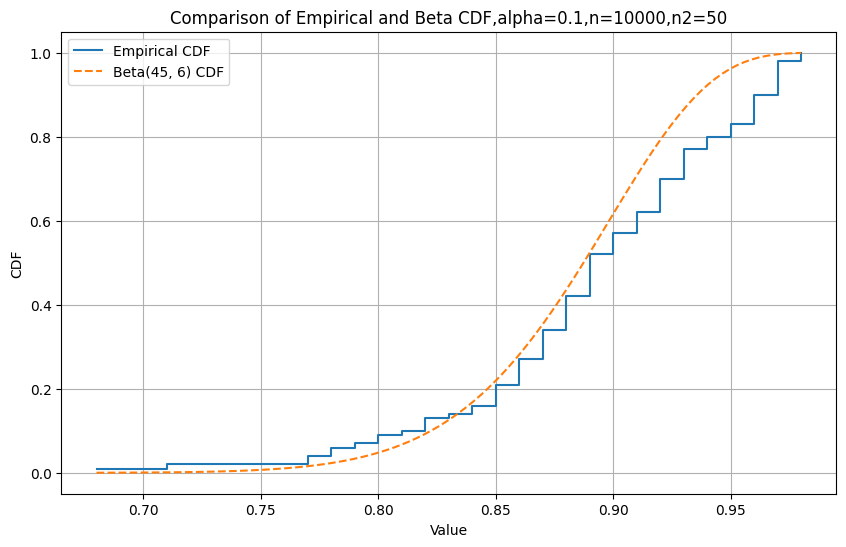

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
def plot_cdfs(X, k, n):
    # Calculate empirical CDF
    X_sorted = np.sort(X)
    cdf_x = np.arange(1, len(X) + 1) / len(X)

    # CDF of the Beta distribution
    beta_cdf_x = np.linspace(min(X), max(X), 100)
    beta_cdf_y = beta.cdf(beta_cdf_x, k, n + 1 - k)

    # Plotting the CDFs
    plt.figure(figsize=(10, 6))
    plt.step(X_sorted, cdf_x, where="post", label='Empirical CDF')
    plt.plot(beta_cdf_x, beta_cdf_y, label=f'Beta({k}, {n+1-k}) CDF', linestyle='--')
    plt.title('Comparison of Empirical and Beta CDF,alpha=0.1,n=10000,n2=50')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

ka=int(0.9*50)
plot_cdfs(re[0],ka,50)


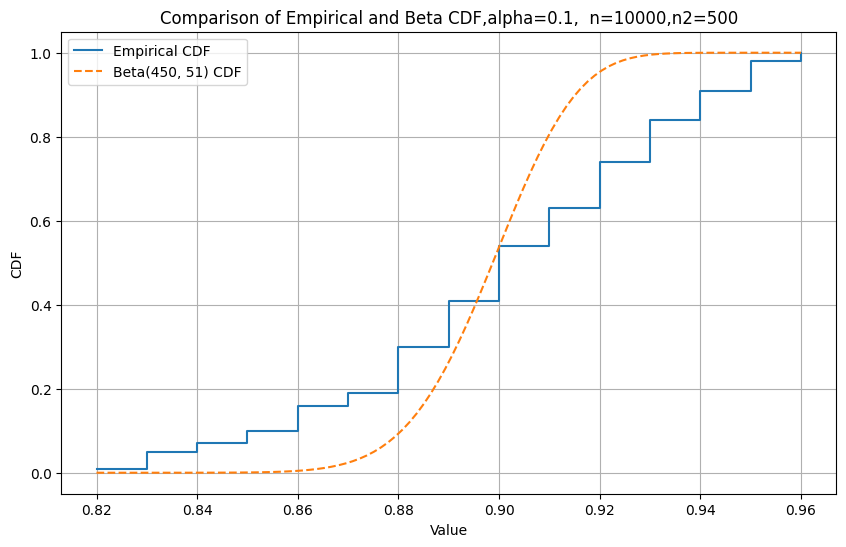

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
def plot_cdfs(X, k, n):
    # Calculate empirical CDF
    X_sorted = np.sort(X)
    cdf_x = np.arange(1, len(X) + 1) / len(X)

    # CDF of the Beta distribution
    beta_cdf_x = np.linspace(min(X), max(X), 100)
    beta_cdf_y = beta.cdf(beta_cdf_x, k, n + 1 - k)

    # Plotting the CDFs
    plt.figure(figsize=(10, 6))
    plt.step(X_sorted, cdf_x, where="post", label='Empirical CDF')
    plt.plot(beta_cdf_x, beta_cdf_y, label=f'Beta({k}, {n+1-k}) CDF', linestyle='--')
    plt.title('Comparison of Empirical and Beta CDF,alpha=0.1,  n=10000,n2=500')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

ka=int(0.9*500)
plot_cdfs(re[1],ka,500)


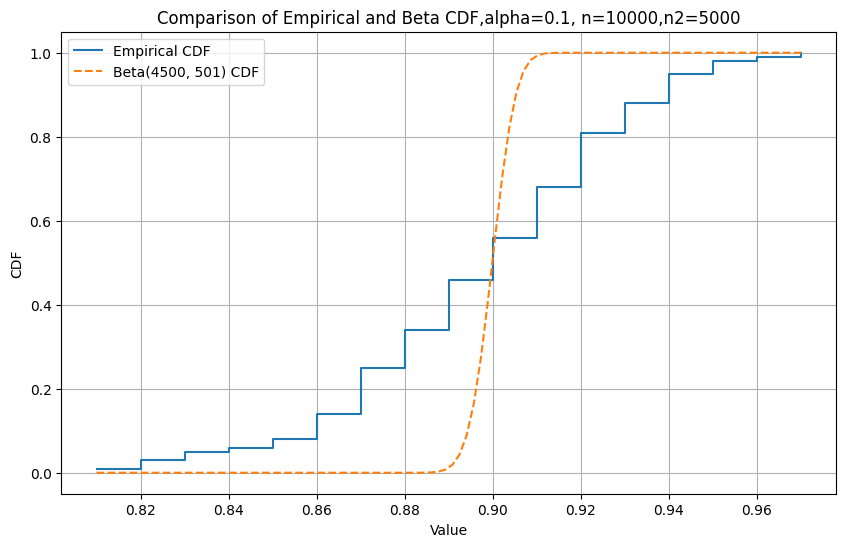

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
def plot_cdfs(X, k, n):
    # Calculate empirical CDF
    X_sorted = np.sort(X)
    cdf_x = np.arange(1, len(X) + 1) / len(X)

    # CDF of the Beta distribution
    beta_cdf_x = np.linspace(min(X), max(X), 100)
    beta_cdf_y = beta.cdf(beta_cdf_x, k, n + 1 - k)

    # Plotting the CDFs
    plt.figure(figsize=(10, 6))
    plt.step(X_sorted, cdf_x, where="post", label='Empirical CDF')
    plt.plot(beta_cdf_x, beta_cdf_y, label=f'Beta({k}, {n+1-k}) CDF', linestyle='--')
    plt.title('Comparison of Empirical and Beta CDF,alpha=0.1, n=10000,n2=5000')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

ka=int(0.9*5000)
plot_cdfs(re[2],ka,5000)


# Prob 3

Use abs norm

In [68]:
import numpy as np
size = 100000
def calculate_w(Xt, Yt):
    return np.dot(Xt, Yt) / np.dot(Xt, Xt)

def deviation_score(x, y, w):
    return abs(w * x - y)

def calculate_quantile(scores, alpha):
    return sorted(scores)[int(np.floor((1 - alpha) * (len(scores) + 1)))]

def simulate_new_data(w, quantile):
    num = 0
    i=0
    while i<100:
        x= np.random.exponential(scale=1, size=1)
        if x>0.01:continue
        y = 5 * x + np.random.normal(0, 1)
        if deviation_score(x, y, w) < quantile:
            num += 1
        i+=1
    return num/100

def main_simulation(alpha, n2n):
    results = []
    
    for n2 in n2n:
        rr=np.zeros(100)
        for i in range(100):#repeat 100 times
            X = np.random.exponential(scale=1, size=1000000)
            X=X[X<0.01]
            l=2000
            X=X[:l]
            Y = 5 * X + np.random.normal(0, 1, l)
            X1, Y1 = X[l-n2:], Y[l-n2:]
            X2, Y2 = X[:n2], Y[:n2]#devide D1 D2

            w = calculate_w(X1, Y1)#use OLS on D1
            scores = [deviation_score(X2[i], Y2[i], w) for i in range(n2)]
            quantile = calculate_quantile(scores, alpha)
            
            num = simulate_new_data(w, quantile)#compute the empirical probability
            rr[i]=num
            
        results.append(rr)

    return results,l
n22n= [500]
ree,l=main_simulation(0.1,n22n)


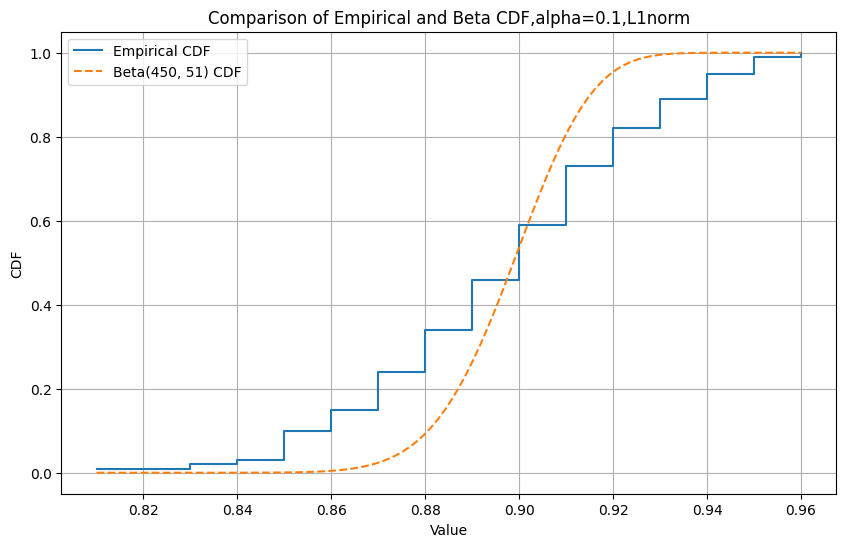

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
def plot_cdfs(X, k, n):
    # Calculate empirical CDF
    X_sorted = np.sort(X)
    cdf_x = np.arange(1, len(X) + 1) / len(X)

    # CDF of the Beta distribution
    beta_cdf_x = np.linspace(min(X), max(X), 100)
    beta_cdf_y = beta.cdf(beta_cdf_x, k, n + 1 - k)

    # Plotting the CDFs
    plt.figure(figsize=(10, 6))
    plt.step(X_sorted, cdf_x, where="post", label='Empirical CDF')
    plt.plot(beta_cdf_x, beta_cdf_y, label=f'Beta({k}, {n+1-k}) CDF', linestyle='--')
    plt.title('Comparison of Empirical and Beta CDF,alpha=0.1,L1norm')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

ka=int(0.9*500)
plot_cdfs(ree[0],ka,500)


Use L2-norm

In [71]:
import numpy as np
size = 100000
X = np.random.exponential(scale=1, size=1000000)
X=X[X<0.01]
l=len(X)
Y = 5 * X + np.random.normal(0, 1, l)
def calculate_w(Xt, Yt):
    return np.dot(Xt, Yt) / np.dot(Xt, Xt)

def deviation_score(x, y, w):
    return (w * x - y)*(w * x - y)

def calculate_quantile(scores, alpha):
    return sorted(scores)[int(np.floor((1 - alpha) * (len(scores) + 1)))]

def simulate_new_data(w, quantile):
    num = 0
    i=0
    while i<100:
        x= np.random.exponential(scale=1, size=1)
        if x>0.01:continue
        y = 5 * x + np.random.normal(0, 1)
        if deviation_score(x, y, w) < quantile:
            num += 1
        i+=1
    return num/100

def main_simulation(alpha, n2n):
    results = []
    
    for n2 in n2n:
        rr=np.zeros(100)
        for i in range(100):#repeat 100 times
            X = np.random.exponential(scale=1, size=1000000)
            X=X[X<0.01]
            l=2000
            X=X[:l]
            Y = 5 * X + np.random.normal(0, 1, l)
            X1, Y1 = X[l-n2:], Y[l-n2:]
            X2, Y2 = X[:n2], Y[:n2]#devide D1 D2

            w = calculate_w(X1, Y1)#use OLS on D1
            scores = [deviation_score(X2[i], Y2[i], w) for i in range(n2)]
            quantile = calculate_quantile(scores, alpha)
            
            num = simulate_new_data(w, quantile)#compute the empirical probability
            rr[i]=num
            
        results.append(rr)

    return results,l
n22n= [500]
ree,l=main_simulation(0.1,n22n)


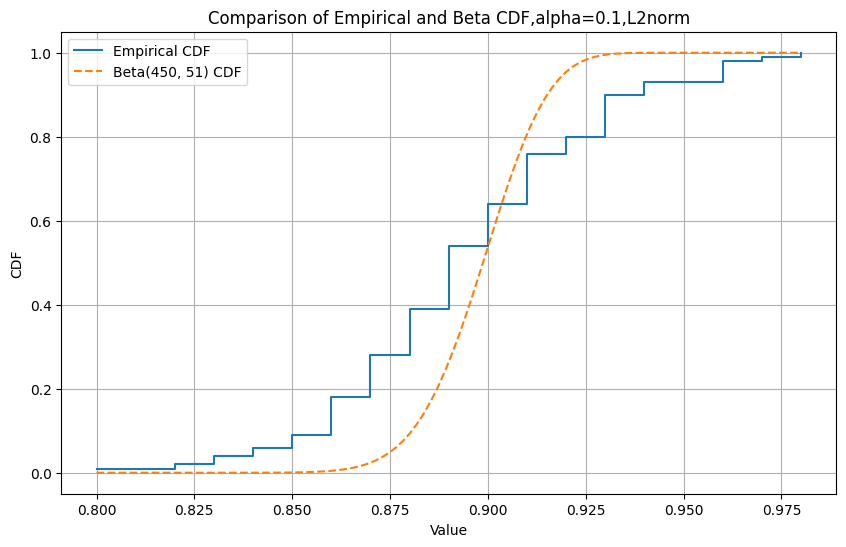

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
def plot_cdfs(X, k, n):
    # Calculate empirical CDF
    X_sorted = np.sort(X)
    cdf_x = np.arange(1, len(X) + 1) / len(X)

    # CDF of the Beta distribution
    beta_cdf_x = np.linspace(min(X), max(X), 100)
    beta_cdf_y = beta.cdf(beta_cdf_x, k, n + 1 - k)

    # Plotting the CDFs
    plt.figure(figsize=(10, 6))
    plt.step(X_sorted, cdf_x, where="post", label='Empirical CDF')
    plt.plot(beta_cdf_x, beta_cdf_y, label=f'Beta({k}, {n+1-k}) CDF', linestyle='--')
    plt.title('Comparison of Empirical and Beta CDF,alpha=0.1,L2norm')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

ka=int(0.9*500)
plot_cdfs(ree[0],ka,500)
